In [3]:
import pandas as pd

In [4]:
df_bookings = pd.read_csv(r"E:\CodeBasics\Python\pandas\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.shape

(134590, 12)

In [6]:
df_bookings.room_category.unique() #total unique room categories

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings.booking_platform.unique() #total_unique booking platforms

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<Axes: >

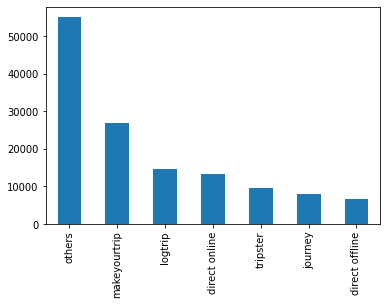

In [8]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_date = pd.read_csv(r'datasets/dim_date.csv')
df_hotels = pd.read_csv(r'datasets/dim_hotels.csv')
df_rooms = pd.read_csv(r'datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv(r'datasets/fact_aggregated_bookings.csv')

# Data cleaning 

In [11]:
df_bookings = df_bookings[df_bookings.no_guests > 0]

In [12]:
avg  ,std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg,std

(15378.036937686695, 93040.15493143328)

In [13]:
higher_limit = avg + 3*std

In [14]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]


# Data Transformation


In [15]:
# calculate occupancy percentage
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda x: x['successful_bookings']/ x['capacity'], axis  = 1)
df_agg_bookings['occ_pct']  = round(df_agg_bookings.occ_pct*100 ,2 )
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


**Find average room occupancy rate** 

In [16]:
df_agg_bookings.groupby(['room_category'])['occ_pct'].mean()

room_category
RT1    58.224247
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64

In [17]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [18]:
df_merge  = pd.merge(df_agg_bookings, df_rooms, left_on = 'room_category', right_on = 'room_id')
df_merge.groupby(['room_class'])['occ_pct'].mean() ## here is ans

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.224247
Name: occ_pct, dtype: float64

In [19]:
df_merge.drop('room_id', axis = 1, inplace= True)


In [20]:
df_merge

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


**2. Print average occupancy rate per city**


In [21]:
df_ans2 = pd.merge(df_agg_bookings, df_hotels, on = 'property_id')
df_ans2.groupby(['city'])['occ_pct'].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [22]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [23]:
df_ans3 = pd.merge(df_date, df_agg_bookings, left_on = 'date', right_on = 'check_in_date')
df_ans3.groupby(['day_type'])['occ_pct'].mean().round(2) # here is ans

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [24]:
df_jun22 = df_ans3[df_ans3['mmm yy']=='Jun 22']
df_ans4 = pd.merge(df_jun22 , df_hotels, on = 'property_id' )
df_ans4.groupby(['city'])['occ_pct'].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

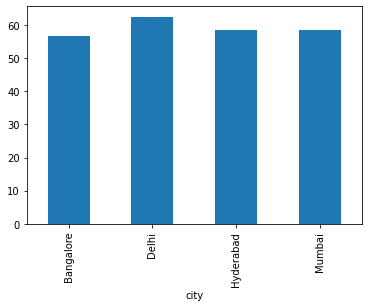

In [25]:
df_ans4.groupby(['city'])['occ_pct'].mean().plot(kind= 'bar')

**Revenue Realized By city**

In [26]:
df_ans5 = pd.merge(df_bookings, df_hotels , on = 'property_id')
df_ans5.groupby(['city'])['revenue_realized'].sum().sort_values()

city
Delhi        294404488
Hyderabad    325179310
Bangalore    420383550
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

In [34]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"])

In [32]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [35]:
df_ans6 = pd.merge(df_date, df_bookings, left_on= 'date', right_on= 'check_in_date')
df_ans6

,date,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,2022-05-05,May 22,W 19,weekeday,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010
1,2022-05-05,May 22,W 19,weekeday,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,2022-05-05,May 22,W 19,weekeday,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010
3,2022-05-05,May 22,W 19,weekeday,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100
4,2022-05-05,May 22,W 19,weekeday,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92573,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
92574,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
92575,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
92576,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [36]:
df_ans6.groupby(['mmm yy'])['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64